<a href="https://colab.research.google.com/github/OlesyaGruznova/WareHouse/blob/main/Final_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты
Требуется выполнить следующее задание:
# Задание Баллы
1 Загрузите файл HR.csv в pandas dataframe 5
2 Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).
10
3 Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.
10
4 Рассчитайте сколько сотрудников работает в каждом
департаменте.
5
5 Показать распределение сотрудников по зарплатам. 5
6 Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности
5
7 Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом
10
8 Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
10
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов
9 Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки
20
10 Загрузить jupyter notebook с решение на github и прислать ссылку 5
Итого - максимум 85 баллов
Для зачета необходимо набрать минимум 55

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
#import missingno as msno

#1. Загрузите файл HR.csv в pandas dataframe (5 баллов)
df = pd.read_csv('/content/drive/MyDrive/Final HomeWork/HR.csv' )

#df = pd.read_csv('https://raw.githubusercontent.com/catprokhorova/HW_datasets/main/EDA_1/german_used_cars.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
#2 Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,стандартное отклонение). 10
#С помощью describe() посмотрим основные статистики для переменных (среднее, мин/макс, сред.отклонение )
df[['Work_accident','left', 'promotion_last_5years']].astype(int)
df[['Work_accident','left', 'promotion_last_5years']].astype(str)
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
#По категориальным полям рассмотрим mode
df.loc[:,['salary', 'department', 'left','Work_accident',	'promotion_last_5years']].mode()

,salary,department,left,Work_accident,promotion_last_5years
0,low,sales,0,0,0


In [ ]:
#Для всех числовых столбцов найдем медиану
df.median(numeric_only= True)


,0
satisfaction_level,0.64
last_evaluation,0.72
number_project,4.00
average_montly_hours,200.00
time_spend_company,3.00
Work_accident,0.00
left,0.00
promotion_last_5years,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


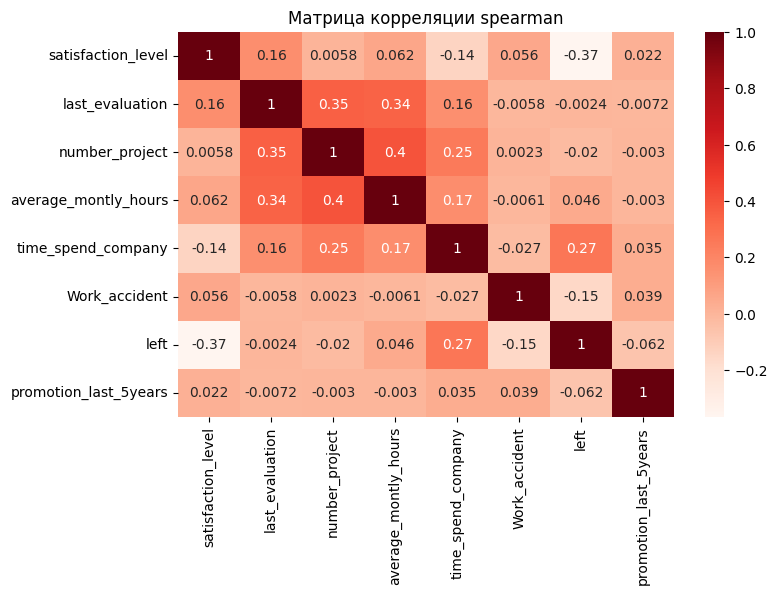

In [ ]:
#3. Рассчитайте и визуализируйте корреляционную матрицу
# для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные. 10
corr_matrix_pearson = df[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident'	, 'left', \
                          'promotion_last_5years']].corr('spearman') #,	#'power_ps',	'transmission_type',	'fuel_type',	'fuel_consumption_l_100km',	'fuel_consumption_g_km',	'mileage_in_km'	]].corr('spearman')
corr_matrix_pearson
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix_pearson, annot=True, cmap='Reds')
plt.title("Матрица корреляции spearman")
plt.show()
# По матрице Spearman видно, что 2 самые    скоррелированные переменные это number_project и average_montly_hours
#                                2 наименее скоррелированные переменные это number_project и work_accident

In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
#4 Рассчитайте сколько сотрудников работает в каждом департаменте. 5
# Будем считать, что в поле left:  0 - это активный работник, 1 - работник уволен
# При подсчёте работников в каждом департаменте учтем, что уволенных работников подсчитывать не нужно
df[df.left != 1].groupby('department')['department'].value_counts().reset_index()


,department,count
0,IT,954
1,RandD,666
2,accounting,563
3,hr,524
4,management,539
5,marketing,655
6,product_mng,704
7,sales,3126
8,support,1674
9,technical,2023


In [ ]:
df[df.left != 1].groupby('promotion_last_5years')['promotion_last_5years'].value_counts().reset_index()

,promotion_last_5years,count
0,0,11128
1,1,300


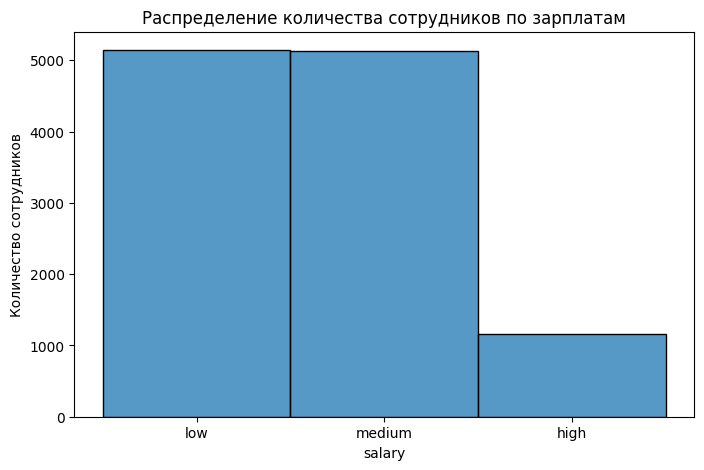

In [ ]:
#5. Показать распределение сотрудников по зарплатам. Всё также исключаем уволенных из выборки. 5
plt.figure(figsize=[8,5])
my_plot = sns.histplot(data = df[df.left != 1], x="salary")
plt.title("Распределение количества сотрудников по зарплатам")
plt.ylabel("Количество сотрудников")
plt.show()

<ipython-input-103-bdab346bc96b>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot. set_xticklabels ( my_plot.get_xticklabels (), rotation= 90, horizontalalignment='right' )


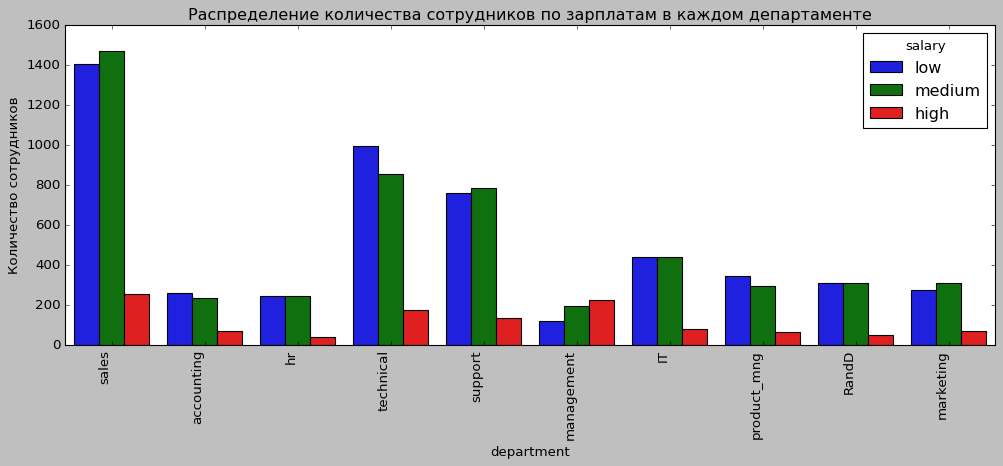

In [ ]:
#6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности. Всё также исключаем уволенных из выборки. 5
mpl.style.use(['classic'])
plt.figure(figsize=[15,5])
my_plot = sns.countplot(data = df[df.left != 1], x="department", hue = 'salary')
plt.title("Распределение количества сотрудников по зарплатам в каждом департаменте")
plt.ylabel("Количество сотрудников")
my_plot. set_xticklabels ( my_plot.get_xticklabels (), rotation= 90, horizontalalignment='right' )


plt.show()

In [ ]:
from typing import TYPE_CHECKING
#7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом 10


import pandas as pd
from scipy import stats


# Отфильтруем данные, исключая уволенных сотрудников
df_not_left = df.query("left != 1")

# Разделение данных на две группы по уровню зарплаты
high_salary = df_not_left.query("salary == 'high'")['average_montly_hours']
low_salary = df_not_left.query("salary == 'low'")['average_montly_hours']

# Проверяем нормальность распределения для выборок
shapiro_high = stats.shapiro(high_salary)
shapiro_low = stats.shapiro(low_salary)

print(f"Показатели критерия Шапиро-Уилка для сотрудников с высоким окладом: статистика={shapiro_high.statistic:.4f}, p-value={shapiro_high.pvalue}")
print(f"Показатели критерия Шапиро-Уилка для сотрудников с низким окладом: статистика={shapiro_low.statistic:.4f}, p-value={shapiro_low.pvalue}")

# Критерий значимости
alpha = 0.05

if shapiro_high.pvalue < alpha or shapiro_low.pvalue < alpha:
    print("Данные не соответствуют нормальному распределению.")
    norm_raspr = False
else:
    print("Данные соответствуют нормальному распределению.")
    norm_raspr = True

# Тест Левена на равенство дисперсий
levene_test = stats.levene(high_salary, low_salary)

print(f"Показатели теста Левена: статистика={levene_test.statistic:.4f}, p-value={levene_test.pvalue}")

if levene_test.pvalue < alpha:
    print("Дисперсии различаются.")
    disp_equal = False
else:
    print("Дисперсии одинаковы.")
    disp_equal = True

if disp_equal == False or norm_raspr == False:
   # Проведение теста Манна-Уитни
   mann_whitney_u, p_value = stats.mannwhitneyu(high_salary, low_salary, alternative='two-sided')
   # Вывод результатов
   print(f"U-статистика: {mann_whitney_u} , p-значение: {p_value}")
else:
   # Проведение t-теста
   t_statistic, p_value = stats.ttest_ind(high_salary, low_salary, equal_var=False)
   # Вывод результатов
   print(f"Т-статистика: {t_statistic:.4f}, p-значение: {p_value}")


# Интерпретация результатов
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Существует значительное различие между часами работы сотрудников с высоким и низким окладом.")
else:
    print("Нет существенного различия между часами работы сотрудников с высоким и низким окладом.")

#Сначала проверили распределения на нормальность и равенство дисперсий.
#В зависимости от результатов проверок применяем соответствующий тест на сравнение средних значений.
#В данном случае выборки оказались распределены ненормально, поэтому применился тест Манна-Уитни.
#По данному тесту получили результат: Нет существенного различия между часами работы сотрудников с высоким и низким окладом

Показатели критерия Шапиро-Уилка для сотрудников с высоким окладом: статистика=0.9719, p-value=3.506094444372371e-14
Показатели критерия Шапиро-Уилка для сотрудников с низким окладом: статистика=0.9746, p-value=2.713998166597771e-29
Данные не соответствуют нормальному распределению.
Показатели теста Левена: статистика=1.8104, p-value=0.17851082673444446
Дисперсии одинаковы.
U-статистика: 3039300.5 , p-значение: 0.2190575096757843
Нет существенного различия между часами работы сотрудников с высоким и низким окладом.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5144.
  res = hypotest_fun_out(*samples, **kwds)


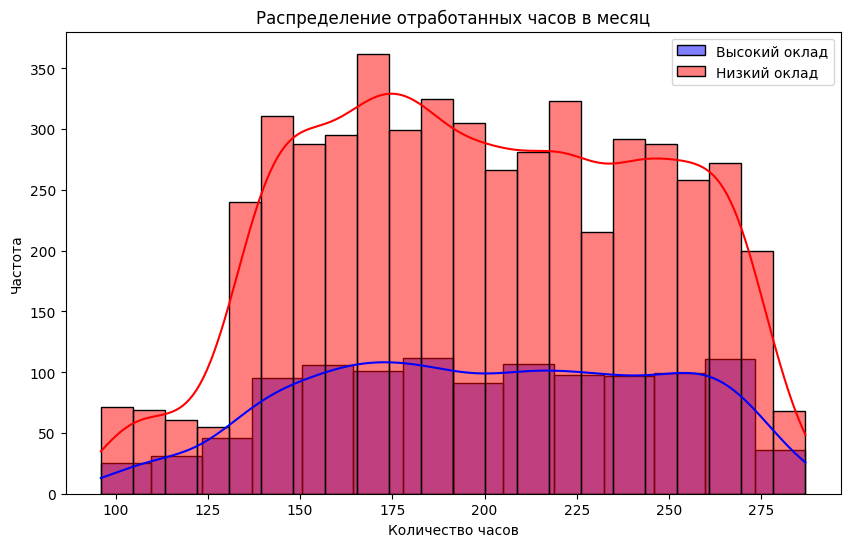

In [ ]:
#Для интереса посмотрим на график выборок часов работы с высокой и низкой заработной платой

import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма для выборок
plt.figure(figsize=(10, 6))
sns.histplot(high_salary, label="Высокий оклад", color="blue", kde=True)
sns.histplot(low_salary, label="Низкий оклад", color="red", kde=True)
plt.title("Распределение отработанных часов в месяц")
plt.xlabel("Количество часов")
plt.ylabel("Частота")
plt.legend()
plt.show()



satisfaction_level - Уровень удовлетворенности работой
Last_evaluation - Время с момента последней оценки в годах
number_projects - Количество проектов, выполненных за время работы
average_monthly_hours - Среднее количество часов на рабочем месте в месяц
time_spend_company - Стаж работы в компании в годах
work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
left - уволился ли сотрудник
promotion_last_5years - повышался ли сотрудник за последние пять лет
department - отдел в котором работает сотрудник
salary - относительный уровень зарплаты Требуется выполнить следующее задание

In [ ]:
#8 Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности): 10
#   ● Доля сотрудников с повышением за последние 5 лет ● Средняя степень удовлетворенности ● Среднее количество проектов


#Доля сотрудников с повышением за последние 5 лет

# группировка по promotion_last_5years по активным
total_emp_promo = df[(df.left != 1)]['promotion_last_5years'].count()
print("Всего количество активных: ", total_emp_promo)

part_emp_promo = df[(df.left != 1) & (df.promotion_last_5years == 1)].groupby('promotion_last_5years')['promotion_last_5years'].count()
print("Количество активных работников, которые были повышены за последние 5 лет", part_emp_promo[1])

# расчёт доли количества работников с promotion_last_5years = 1 от общего количества
dol_of_emp_promo =  part_emp_promo[1]/total_emp_promo * 100
print(f"Доля сотрудников с повышением за последние 5 лет среди активных работников ,{dol_of_emp_promo:.2f} , %")


# группировка по promotion_last_5years по уволенным
total_emp_promo_left = df[(df.left != 0)]['promotion_last_5years'].count()
print("Всего количество уволенных работников", total_emp_promo_left)

part_emp_promo_left = df[(df.left != 0) & (df.promotion_last_5years == 1)].groupby('promotion_last_5years')['promotion_last_5years'].count()
print("Количество уволенных работников, которые были повышены за последние 5 лет",part_emp_promo_left[1])

# расчёт доли количества работников с promotion_last_5years = 1 от общего количества
dol_of_emp_promo_left = part_emp_promo_left[1] / total_emp_promo_left * 100
print(f"Доля сотрудников с повышением за последние 5 лет среди уволенных работников , {dol_of_emp_promo_left:.2f}, %")



avrg_satisfaction_level_act = df[df.left != 1].satisfaction_level.mean()
print ('Средняя степень удовлетворенности среди активных работников', avrg_satisfaction_level_act)


avrg_satisfaction_level_fire = df[df.left != 0].satisfaction_level.mean()
print ('Средняя степень удовлетворенности среди уволенных работников', avrg_satisfaction_level_fire)

avrg_number_projects_act = df[df.left != 1].number_project.mean()
print ('Среднее количество проектов среди активных работников', avrg_number_projects_act)


avrg_number_projects_fire = df[df.left != 0].number_project.mean()
print ('Среднее количество проектов среди уволенных работников', avrg_number_projects_fire)


Всего количество активных:  11428
Количество активных работников, которые были повышены за последние 5 лет 300
Доля сотрудников с повышением за последние 5 лет среди активных работников ,2.63 , %
Всего количество уволенных работников 3571
Количество уволенных работников, которые были повышены за последние 5 лет 19
Доля сотрудников с повышением за последние 5 лет среди уволенных работников , 0.53, %
Средняя степень удовлетворенности среди активных работников 0.666809590479524
Средняя степень удовлетворенности среди уволенных работников 0.4400980117614114
Среднее количество проектов среди активных работников 3.786664333216661
Среднее количество проектов среди уволенных работников 3.8555026603192384


In [ ]:
#9. Разделить данные на тестовую и обучающую выборки Построить модель LDA,
#предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
#Оценить качество модели на тестовой выборки 20

#10. Загрузить jupyter notebook с решение на github и прислать ссылку 5
#Итого - максимум 85 баллов Для зачета необходимо набрать минимум 55